## 텐서플로우로 회귀 모델 만들기
* [첫 번째 신경망 훈련하기: 기초적인 분류 문제  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df[df["Insulin"] > 0]
df.shape

(394, 9)

In [5]:
df.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


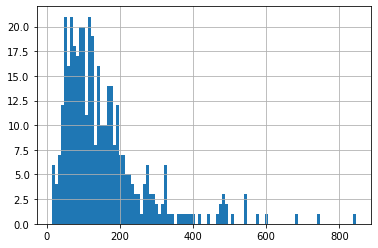

In [6]:
df["Insulin"].hist(bins=100)

In [7]:
train = df.sample(frac=0.8,random_state=0)
test = df.drop(train.index)

train.shape, test.shape

((315, 9), (79, 9))

In [8]:
label_name = "Insulin"

In [9]:
X_train = train.drop(label_name, axis=1)
y_train = train[label_name]

X_train.shape, y_train.shape

((315, 8), (315,))

In [10]:
X_test = test.drop(label_name, axis=1)
y_test = test[label_name]

X_test.shape, y_test.shape

((79, 8), (79,))

In [11]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
497,2,81,72,15,76,30.1,0.547,25,0


In [12]:
data = df.drop(label_name, axis=1)
input_shape = data.shape[1]
input_shape

8

<img src="https://cs231n.github.io/assets/nn1/neural_net.jpeg" width="30%"> <img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

## 딥러닝 레이어 만들기

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(input_shape)),
  tf.keras.layers.Dense(128, activation='relu'), # relu, swish
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


## 학습

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=early_stop)

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
33,10539.184570,70.349167,10539.184570,8930.831055,65.601250,8930.831055,33
34,10177.975586,67.986481,10177.975586,9091.535156,67.555801,9091.535156,34
35,10294.676758,69.822083,10294.676758,9051.658203,66.904533,9051.658203,35
36,10133.062500,67.436600,10133.062500,9137.519531,67.743378,9137.519531,36
37,10338.976562,69.136696,10338.976562,8967.864258,65.380135,8967.864258,37


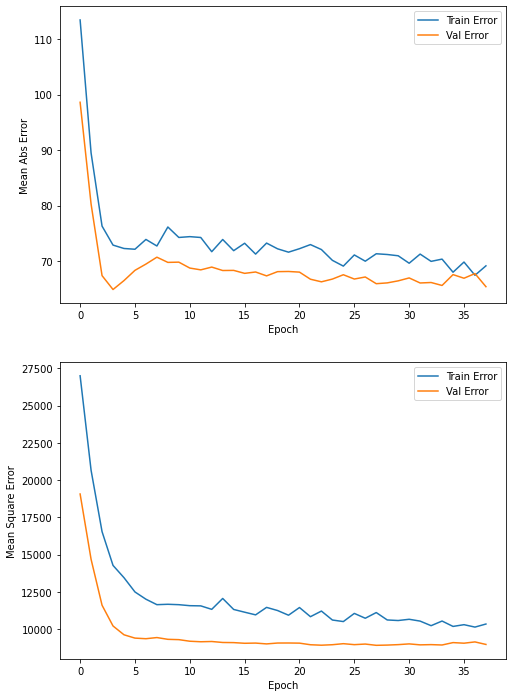

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()

plot_history(history)

## 예측

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[157.24034],
       [261.33038],
       [192.0025 ],
       [124.67479],
       [186.06958]], dtype=float32)

In [19]:
y_predict = y_pred.flatten()
y_predict

array([157.24034 , 261.33038 , 192.0025  , 124.67479 , 186.06958 ,
       144.7435  , 102.26425 ,  87.85701 , 196.43974 , 226.06758 ,
       143.85976 , 140.87885 , 197.87134 , 172.63213 ,  89.913536,
       150.90488 ,   5.250945, 137.9338  , 134.21338 , 150.04425 ,
        85.68396 , 111.561104, 191.72408 , 161.74033 , 113.23083 ,
       139.60254 , 129.67735 , 120.74422 , 213.06908 , 199.21004 ,
       123.90392 , 110.44784 , 189.81332 , 181.05695 ,  77.70759 ,
       234.36075 , 116.496796, 103.67823 , 131.17438 , 155.65582 ,
       162.63062 , 136.57892 , 177.69531 , 128.5866  , 205.91573 ,
       134.62906 , 193.17354 , 202.0127  , 110.40164 , 211.4581  ,
       143.75021 , 156.05154 , 164.36661 , 219.90326 , 103.90152 ,
       273.82446 , 110.20759 , 123.51504 , 199.13449 , 138.69331 ,
       107.36287 , 254.6548  , 117.62225 , 160.18518 , 132.14464 ,
       217.45453 , 160.10681 , 199.06085 ,  61.100407, 125.18334 ,
       196.78879 , 172.03687 , 218.03432 , 151.85333 , 175.042

## 평가

In [20]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

3/3 - 0s - loss: 9780.6660 - mae: 68.6753 - mse: 9780.6660
테스트 세트의 평균 절대 오차: 68.68


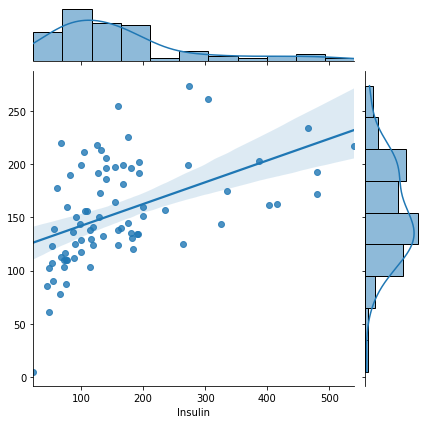

In [21]:
sns.jointplot(x=y_test, y=y_predict, kind="reg")

### MAE

In [22]:
error = y_test - y_predict
mae = abs(error).mean()
mae

68.67532499530647

### MAPE(Mean absolute percentage error)

In [23]:
mape = abs((y_test - y_predict) / y_test).mean()
mape

0.47944008029722224

### MSE

In [24]:
mse = (error) ** 2
mse = mse.mean()
mse

9780.666856639122

### RMSE

In [25]:
np.sqrt(mse)

98.89725403993339